### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/emotion_dataset.pkl", compression='infer')
dataset.head()

Mounted at /content/drive


,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


### Dimension Of the Dataset

In [3]:
rows, cols = dataset.shape
print(f'Emotion Dataset Contains {rows} rows and {cols} columns')

Emotion Dataset Contains 416809 rows and 2 columns


### Types of the Dataset

In [4]:
dataset.dtypes

text        object
emotions    object
dtype: object

### Visualize Unique and Duplicates Entities in  Dataset

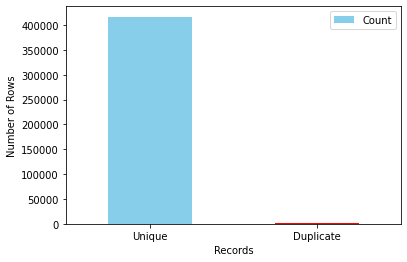

In [5]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text', 'emotions']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### Remove Duplicates Entities of the Dataset

In [6]:
dataset = dataset.drop_duplicates(subset=['text', 'emotions'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 686
After dropping duplicate rows the remaining rows x cols of the dataset are 416123 x 2


### Checking For Null Values in the Dataset

In [7]:
dataset.isna().any()

text        False
emotions    False
dtype: bool

In [8]:
print('There are no NULL values in the dataset')

There are no NULL values in the dataset


### Summary of the Dataset

In [9]:
dataset.describe()

,text,emotions
count,416123,416123
unique,393822,6
top,when,joy
freq,4,140779


### Checking for Sentences with more than 1 emotions

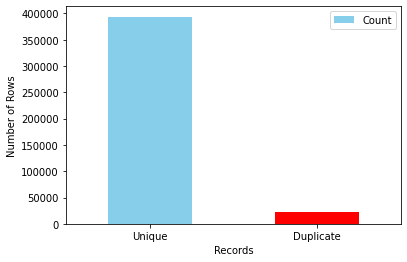

In [10]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows-dup_rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### removing duplicate sentences with more than 1 emotion

In [14]:
dataset = dataset.drop_duplicates(subset=['text'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 22987
After dropping duplicate rows the remaining rows x cols of the dataset are 382136 x 2


### Visualizing the Number of Entities against each Emotion

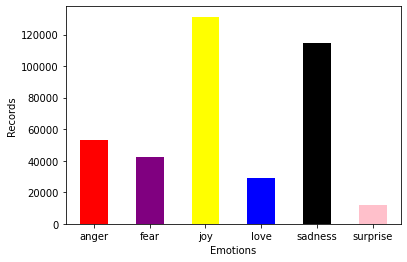

In [15]:
dataset.groupby(['emotions'])['emotions'].count().plot.bar(xlabel='Emotions', ylabel='Records', rot=0, color=['red', 'purple', 'yellow', 'blue', 'black', 'pink'])

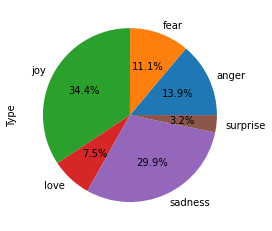

In [19]:
dataset.groupby('emotions').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Cleaning the Dataset

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
# clean the text
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
# replace the old text with the cleaned text
dataset['text'] = dataset['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
dataset.head()

,text,emotions
27383,feel awful job get position succeed happen,sadness
110083,im alone feel awful,sadness
140764,ive probably mentioned really feel proud actua...,joy
100071,feeling little low days back,sadness
2837,beleive much sensitive peoples feelings tend c...,love


In [20]:
dataset.tail()

,text,emotions
566,felt finally accepted bulgarian conservatorie ...,joy
36236,take every day comes focussing eating better m...,fear
76229,suddenly feel everything fake,sadness
131640,im feeling eager ever claw back went pear shap...,joy
64703,give plenty attention even feel utterly miserable,sadness


###Dividing the 6 different labels classes in to their individual classes for downsampling

In [21]:
anger       = dataset[dataset["emotions"] == "anger"]
fear        = dataset[dataset["emotions"] == "fear"]
joy         = dataset[dataset["emotions"] == "joy"]
love        = dataset[dataset["emotions"] == "love"]
sadness     = dataset[dataset["emotions"] == "sadness"]
surprise    = dataset[dataset["emotions"] == "surprise"]

print('Anger:       ',anger.shape)
print('Fear:        ',fear.shape)
print('Joy:         ',joy.shape)
print('Love:        ',love.shape)
print('Sadness:     ',sadness.shape)
print('Surprise:    ',surprise.shape)

Anger:        (53013, 2)
Fear:         (42371, 2)
Joy:          (131319, 2)
Love:         (28843, 2)
Sadness:      (114387, 2)
Surprise:     (12203, 2)


### Downsampling each emotion to "Surprise" length because that is the minimum 

In [22]:
from sklearn.utils import resample
anger_downsample = resample(anger,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
fear_downsample = resample(fear,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
joy_downsample = resample(joy,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
love_downsample = resample(love,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
sadness_downsample = resample(sadness,
             replace=True,
             n_samples=len(surprise),
             random_state=42)

print('Anger:       ',anger_downsample.shape)
print('Fear:        ',fear_downsample.shape)
print('Joy:         ',joy_downsample.shape)
print('Love:        ',love_downsample.shape)
print('Sadness:     ',sadness_downsample.shape)
print('Surprise:    ',surprise.shape)

Anger:        (12203, 2)
Fear:         (12203, 2)
Joy:          (12203, 2)
Love:         (12203, 2)
Sadness:      (12203, 2)
Surprise:     (12203, 2)


### Merging the indvidual downsampled emotions to make a dataset

anger       12203
fear        12203
joy         12203
love        12203
sadness     12203
surprise    12203
Name: emotions, dtype: int64


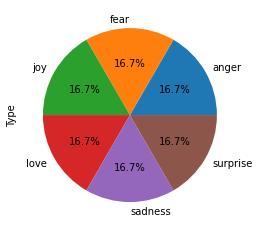

In [23]:
dataset_downsampled = pd.concat([anger_downsample, fear_downsample, joy_downsample, love_downsample, sadness_downsample, surprise ])

print(dataset_downsampled["emotions"].value_counts())

dataset_downsampled.groupby('emotions').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Exporting data set into csv file

In [25]:
dataset_downsampled.to_csv("/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv')
df.head(1000)

,Unnamed: 0,text,emotions
0,32950,hate crowds feeling rushed last minute,anger
1,15798,feel cranky wanderlust know,anger
2,37994,know feels like mad screaming heebie jeebies,anger
3,21055,feel like rushing day feeling cranky frustrate...,anger
4,55042,im like hungry maybe feeling greedy tired im l...,anger
...,...,...,...
995,17717,feel hated href http predmore,anger
996,40572,ponder feel pull violent shove behind,anger
997,55097,im longer feeling bitchy,anger
998,48698,going type since keep entering comments make f...,anger


###Randomizing the dataset

In [26]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv')
print(df.head(1000))
df = df.sample(frac = 1)
print(df.head(1000))
df.to_csv("/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Unnamed: 0                                               text emotions
0         32950             hate crowds feeling rushed last minute    anger
1         15798                        feel cranky wanderlust know    anger
2         37994       know feels like mad screaming heebie jeebies    anger
3         21055  feel like rushing day feeling cranky frustrate...    anger
4         55042  im like hungry maybe feeling greedy tired im l...    anger
..          ...                                                ...      ...
995       17717                      feel hated href http predmore    anger
996       40572              ponder feel pull violent shove behind    anger
997       55097                           im longer feeling bitchy    anger
998       48698  going type since keep entering comments make f...    anger
999        5224  heart broken day h

In [28]:
import tensorflow
from tensorflow import keras
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
data = df[['text', 'emotions']]
data.shape
data.emotions.value_counts()

joy         12203
anger       12203
sadness     12203
fear        12203
love        12203
surprise    12203
Name: emotions, dtype: int64

In [35]:
data.head(1000)

,text,emotions
35086,feel considerate like,joy
6430,suddenly feel aggravated weird feeling cant ev...,anger
59086,feel like punished,sadness
6630,feel conflicted angry wish could blame someone...,anger
15920,used check people often tried seek things feel...,fear
...,...,...
50094,many encounters speak eact two already worn fe...,sadness
27666,feel artistic implications musicians similar s...,joy
31635,feel talented musical artist,joy
16121,need move away depending compositional fodder ...,fear


In [36]:
def example_complain(index):
  example = data[data.index == index][['text','emotions']].values[0]
  if len(example)>0:
    print(example[0])
    print()
    print('Category:',example[1])

In [37]:
example_complain(10)

feel like constantly distracted

Category: anger


In [38]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['text'] = data['text'].apply(clean_text)

In [39]:
example_complain(10)

feel like ate ton past week surprised see weight go last week

Category: surprise


In [40]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32235 unique tokens.


In [41]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (73218, 250)


In [42]:
X

array([[    0,     0,     0, ...,     1,  1499,     3],
       [    0,     0,     0, ...,    40,    16,   948],
       [    0,     0,     0, ...,     1,     3,   832],
       ...,
       [    0,     0,     0, ...,    51,    94,  3851],
       [    0,     0,     0, ...,   110,    97, 32235],
       [    0,     0,     0, ...,   803,  4551,  5161]], dtype=int32)

In [43]:
Y = pd.get_dummies(data['emotions']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (73218, 6)


In [44]:
Y

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(65896, 250) (65896, 6)
(7322, 250) (7322, 6)


In [46]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 5,081,006
Trainable params: 5,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
927/927 [==============================] - 741s 794ms/step - loss: 0.4496 - accuracy: 0.8456 - val_loss: 0.1201 - val_accuracy: 0.9608
Epoch 2/5
927/927 [==============================] - 737s 795ms/step - loss: 0.0873 - accuracy: 0.9696 - val_loss: 0.1037 - val_accuracy: 0.9628
Epoch 3/5
927/927 [==============================] - 735s 793ms/step - loss: 0.0577 - accuracy: 0.9787 - val_loss: 0.1027 - val_accuracy: 0.9604
Epoch 4/5
927/927 [==============================] - 735s 793ms/step - loss: 0.0414 - accuracy: 0.9851 - val_loss: 0.1194 - val_accuracy: 0.9610
Epoch 5/5
927/927 [==============================] - 733s 791ms/step - loss: 0.0332 - accuracy: 0.9880 - val_loss: 0.1174 - val_accuracy: 0.9616


In [48]:
import keras
model.save("/content/drive/My Drive/Colab Notebooks/EMod_1")
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/EMod_1')

In [49]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

229/229 [==============================] - 24s 100ms/step - loss: 0.1098 - accuracy: 0.9627
Test set
  Loss: 0.110
  Accuracy: 0.963


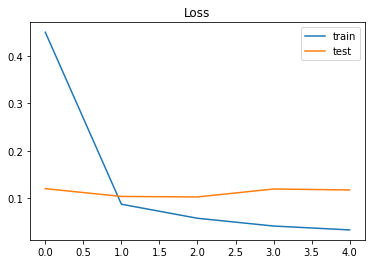

In [50]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

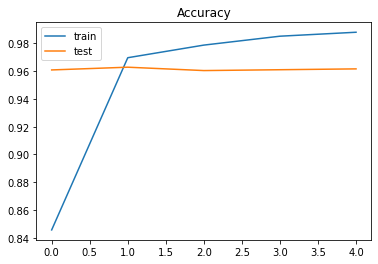

In [51]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [59]:
new_complaint = ['sadness is what consumes uss all']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 49ms/step
[[0.29295564 0.07315674 0.02360838 0.46570623 0.12185184 0.02272108]] sadness


In [60]:
new_complaint = ['ambigious state of mind leads to depression']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 60ms/step
[[0.17532578 0.39453754 0.0515577  0.06099027 0.17525424 0.14233448]] joy
